## Decision Tree Classifier vs. Neural Network for the hand written digits classification

Here we present a basic and well-known example for the application of neural networks: **recognising handwritten digits**. We compare two standard methods known in machine learning, i.e. **decision trees** and **neural networks**, and we compare their performance. For neural networks, we use two approaches. The first is a simple neural network with no hidden layers. Then we add **hidden layers** to the network to observe the increase in the method's effectiveness.

In [8]:
# Here we import all the necessary packages and functions
# We are using Python scikit-learn Machine Learning library and MNIST (database of handwritten digits)

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
import random
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X is array of instances and y is a vector of labels 

Next, we will divide the data into a **training set** and **test set**, randomly selecting 5000 examples for training (train_samples = 5000) and 1000 examples for testing (test_size = 1000).

In [4]:
train_samples = 5000

# X is in pandas format for some reason. Convert to numpy.
X = np.array(X)
y = np.array(y)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=1000)

X_train, y_train are instances & labels for training AND X_test, y_test are instances & labels for testing

An instance, in this case, is a vector of 784 (that is 28 x 28 grid of pixels turned into the vector). Integers between 0 and 255 indicate the brightness of the pixel with 255 the pixel is fully activated (bright), and 0 the pixel is black

Below we print out one random example of the vector from the testing set with its label. 


In [5]:
import random
i = random.randint(0, len(X_train))
print(X_train[i])
print("The number that labels this instance:", y_train[i])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

Below we present a graphical representation of the instance " i ".

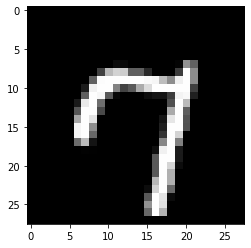

In [6]:
img = np.array(X_train[i]).reshape(28,28)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

## Decision Tree Classifier
Here we use the decision tree to classify the number into the correct category. We can alter the classifier's precision by changing the number of leaves (max_leaf_nodes). A tree with fewer decision rules (leaves) performs worst, but adding more decision rules than some number (here around 160) does not increase the precision of this method. As an output, we can compute the **accuracy** of this method for a given number of leaves. 


In [71]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 160)
clf = clf.fit(X_train, y_train)
correct = 0
for i in range(len(X_test)):
  if clf.predict([X_test[i]]) == y_test[i]: correct = correct + 1
  acc = [100.0* correct / len(X_test)]
acc

[80.0]

## Neural Network Classifier
Here we are using MLPClassifier (MLP stands for **multi-layer perceptron** or **neural network**) 

*hidden_layer_sizes = []* is an empty list, since here we do not consider any hidden leyers

*max_iter = 10000* - we train network no more then 10000 iterations 

*activation = 'identity'* - since we are using linear activation 

The architecture of this network consists of 784 input nodes for each pixel and 10 output nodes for numbers from 0 to 9.


In [9]:
clf = MLPClassifier(hidden_layer_sizes=[], max_iter = 10000, activation = 'identity')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.843


## Neural Network with hidden layer
Now, we will add one **hidden layer** and expand the number of **hidden units** from 10 to 200 in intervals of 10. 
We'll print the accuracy of each model given the number of hidden units.

Here we ara using ReLU activation function 

In [24]:
for i in range(1,21):
  nhidden = i*10
  clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 10000)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print("Number of hidden units:", nhidden, ";", "Accuracy", score)

Number of hidden units: 10 ; Accuracy 0.362
Number of hidden units: 20 ; Accuracy 0.697
Number of hidden units: 30 ; Accuracy 0.869
Number of hidden units: 40 ; Accuracy 0.887
Number of hidden units: 50 ; Accuracy 0.849
Number of hidden units: 60 ; Accuracy 0.854
Number of hidden units: 70 ; Accuracy 0.88
Number of hidden units: 80 ; Accuracy 0.885
Number of hidden units: 90 ; Accuracy 0.889
Number of hidden units: 100 ; Accuracy 0.893
Number of hidden units: 110 ; Accuracy 0.901
Number of hidden units: 120 ; Accuracy 0.877
Number of hidden units: 130 ; Accuracy 0.91
Number of hidden units: 140 ; Accuracy 0.894
Number of hidden units: 150 ; Accuracy 0.913
Number of hidden units: 160 ; Accuracy 0.907
Number of hidden units: 170 ; Accuracy 0.893
Number of hidden units: 180 ; Accuracy 0.902
Number of hidden units: 190 ; Accuracy 0.893
Number of hidden units: 200 ; Accuracy 0.909


We can see that model reaches its maximum accuracy of around 150 hidden units. 
Next, we train it ten times with 150 hidden units to see how a model varies across multiple runs.

In [25]:
nhidden = 150
for i in range(10):
  clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 10000)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(nhidden,score)

150 0.912
150 0.891
150 0.901
150 0.886
150 0.896
150 0.903
150 0.888
150 0.905
150 0.896
150 0.894


Now, we will try 10 hidden units in each of 1 to 10 layers, keeping track of the min/mean/max accuracy of models at each number of layers over ten runs. 
We can observe significant increse in the accuracy of the model due to the additional hidden layers. 
More layers give the network more power to express complex concepts

In [11]:
reps = 10
for i in range(1,11):
    nhidden = i*[100]
    accsum,accmin,accmax = 0.0,1.0,0.0
    for r in range(reps):
        clf = MLPClassifier(hidden_layer_sizes=nhidden, max_iter = 10000)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        accsum += score
        accmin = min(accmin, score)
        accmax = max(accmax, score)
    print(i, accmin, accsum/reps, accmax)

1 0.852 0.8718 0.894
2 0.836 0.8593999999999999 0.875
3 0.839 0.85 0.871
4 0.85 0.8648 0.878
5 0.868 0.8825 0.893
6 0.883 0.8927000000000002 0.902
7 0.902 0.9073 0.916
8 0.9 0.9151000000000001 0.932
9 0.899 0.9213000000000001 0.937
10 0.913 0.9269000000000001 0.945


## Conclusions
Here we have compared the performance of the Decision Tree Classifier and simple Neural Network for written digit recognition. We can observe improved performance for Neural Networks compared to Decision Tree, and adding a hidden layer increases the accuracy of the model even higher to around 90%. Nevertheless, there is still space for significant improvement since 90% does not seem good enough for practical use. 
